<link rel="stylesheet" type="text/css" href="custom.css">

# Activation impacts on fast cloud responses in a coupled aerosol-climate model ...

## ... and nifty visualization / analysis tools

### or - *Why I don't have cool results to show you (yet)*

**Daniel Rothenberg (darothen@mit.edu)**

Joint Program Student Luncheon, July 16, 2015

<div id="logos">
    <img src="media/paoc_logo.png" />
    <img src="media/eaps_logo.png" />
    <img src="media/mit_logo.png" />
</div>

<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png">
<img src="https://store.continuum.io/static/img/anaconda_logo_web.png">

# Python for Scientists

- Mature (well-documented, efficient, easy-to-use) data analysis packages
- Portable ecosystem - any machine, any operating system
- Huge userbase
- Many cool tools in active development
- Supports many different development styles
    - scripting (editing files from terminal/shell)
    - notebook environment
    - full-blown IDEs for software development - [Spyder](https://github.com/spyder-ide/spyder), [PyCharm](https://www.jetbrains.com/pycharm/), etc.

<img src="media/jakevdp_ecosystem.png" />

## Python helps create reproducible, verifiable science

# Reproducibility (1) - Version Control

In [12]:
import subprocess

In [16]:
def get_git_versioning():
    """ Returns the currently checked out commit shortname. """
    return subprocess.check_output(
        ['git', 'rev-parse', '--short', 'HEAD']
    ).strip()

print("Current HEAD git commit: ", str(get_git_versioning()))

Current HEAD git commit:  b'3fde6fc'


**Fetch *git* commit at any time, attach it as metadata in whatever figure or output file you create**

But why should you care about this?

<img src="media/marc_aie_tree.png" />

In [35]:
!git log -2

commit d667821e910c1104ce48bd80fc2dec29be01f612
Author: Daniel Rothenberg <darothen@mit.edu>
Date:   Thu Jul 16 09:59:45 2015 -0400

    Unified naming scheme for notebooks

commit 383aaa394614be2ee78a6943bc0a720bb742d98d
Author: Daniel Rothenberg <darothen@mit.edu>
Date:   Thu Jul 16 09:55:07 2015 -0400

    updated global radiative forcing (PD - PI) change calculations


In [19]:
import os
pwd = os.getcwd()
os.chdir("/Users/daniel/workspace/Research/marc_aie")

**Oh no, I broke something!**

In [30]:
!git diff ee8a2e9 ebe1ce2 marc_aie/convert.py

diff --git a/marc_aie/convert.py b/marc_aie/convert.py
index ed7d01a..4120eab 100644
--- a/marc_aie/convert.py
+++ b/marc_aie/convert.py
@@ -109,12 +109,12 @@ def create_master(var, data_dict=None, new_fields=["PS", ]):
     if isinstance(var, str):
         assert data_dict is not None
         acts, aers = decompose_multikeys(list(data_dict.keys()))
-        new_fields.append(var)
+        new_fields += var
     elif isinstance(var, Var):
         data_dict = var.data
         acts = var.cases['act']
         aers = var.cases['aer']
-        new_fields.append(var.varname)
+        new_fields += var.varname
     else:
         raise ValueError("`var` must be a Var or a string.")
 


## But, I can't make my *[insert-super-secret-project]* public!

<img src="media/github_mit.png" />

# Reproducibility (2) - Environments

## Common Problems

- Something changed in a version of a toolkit or a package and now I get different answers!
- It's worse, my code doesn't even run any more!
- Someone forgot to tell me that I need package *xyz:v.a.b.c* but it won't compile on my machine!
- It's worse, it has a conflicting dependency with another package that I **really** need!

## Solution - Package Managers

### [`conda`](http://conda.pydata.org/docs/)

- A python package manager with sophisticated environment management (a là `virtualenv`)
- Maintain minimal Python installation for a given project
- Distribute and automatically build your dependencies
- Automatically comes with [Anaconda Python distribution](http//www.continuum.io/anaconda) and [Miniconda](http://conda.pydata.org/miniconda.html)
- Social site [binstar](https://binstar.org) for contributing packages

### [`Docker`](https://www.docker.com/)

- Full-stack software management
- Rapidly re-deploy your entire working environment to a new machine (local, supercomputer, distributed)

**environment.yml**

```yaml
name: marc_aie
channels:
  - unidata
  - scitools
dependencies:
  - cartopy>=0.12
  - ipython>=3.2.0
  - ipython-notebook
  - matplotlib
  - netcdf4
  - numpy
  - python=3.4
  - seaborn
  - xlrd
  - xray>=0.5
```

**Create environment based on `environment.yml`**

```bash
cd [my_repo_dir]
conda env create
```

**Activate environment**

```bash
source activate marc_aie
```

In [45]:
!conda info -e

# conda environments:
#
cartopy_py3              /Users/daniel/anaconda/envs/cartopy_py3
ipython-dev              /Users/daniel/anaconda/envs/ipython-dev
iris_1_7_2               /Users/daniel/anaconda/envs/iris_1_7_2
marc_aie              *  /Users/daniel/anaconda/envs/marc_aie
marc_aie2                /Users/daniel/anaconda/envs/marc_aie2
pymc3_test               /Users/daniel/anaconda/envs/pymc3_test
python3                  /Users/daniel/anaconda/envs/python3
scipy-tutorial           /Users/daniel/anaconda/envs/scipy-tutorial
vispy_test               /Users/daniel/anaconda/envs/vispy_test
root                     /Users/daniel/anaconda



In [46]:
!conda list

# packages in environment at /Users/daniel/anaconda/envs/marc_aie:
#
binstar                   0.11.0                   py34_0    defaults
cartopy                   0.13.0               np19py34_0    https://conda.binstar.org/unidata/osx-64/cartopy-0.13.0-np19py34_0.tar.bz2
certifi                   14.05.14                 py34_0    defaults
clyent                    0.3.4                    py34_0    defaults
curl                      7.38.0                        0    http://repo.continuum.io/pkgs/free/osx-64/curl-7.38.0-0.tar.bz2
freetype                  2.5.2                         2    defaults
geos                      3.4.2                         4    https://conda.binstar.org/unidata/osx-64/geos-3.4.2-4.tar.bz2
hdf5                      1.8.14                        0    defaults
ipython                   3.2.1                    py34_0    defaults
ipython-notebook          3.2.1                    py34_0    defaults
jinja2                    2.7.3                    py34_1

In [48]:
!binstar search -t conda cartopy

Using binstar api site https://api.anaconda.org
Run 'binstar show <USER/PACKAGE>' to get more details:
Packages:
     Name                      |  Version | Package Types   | Platforms      
     ------------------------- |   ------ | --------------- | ---------------
     ChrisBarker/cartopy       |          | conda           | osx-64         
                                          : None
     asmeurer/cartopy          |   0.11.1 | conda           | linux-64       
                                          : None
     benbovy/cartopy           |   0.11.2 | conda           | linux-64, osx-64
                                          : A library providing cartographic tools for python
     christophkeller/cartopy   |   0.11.2 | conda           | osx-64         
                                          : A library providing cartographic tools for python
     jklymak/cartopy           |    1.6.0 | conda           | osx-64         
                                          : None
     

<img src="media/binstar.png" />

# Visualizations

<a href="http://scitools.org.uk/cartopy/docs/latest/"><img src="http://scitools.org.uk/images/cartopy.png" class=centered/></a>

**[Cartopy](http://scitools.org.uk/cartopy/docs/latest/) is a powerful wrapper for matplotlib enabling cartographic/geographic transformations of your data**

In [74]:
import marc_aie as ma
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

v = ma.CESMVar("TS")
v.load_datasets()
v.apply(lambda ds: ds['TS'].mean("time"))
data = v.data['arg_comp', 'F2000']
print(data)

Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_min_smax_F2000_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_min_smax_F1850_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_comp_F2000_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_comp_F1850_TS.nc
<xray.DataArray 'TS' (lat: 96, lon: 144)>
array([[ 218.58482361,  218.5799408 ,  218.60137939, ...,  218.58233643,
         218.57707214,  218.59594727],
       [ 218.88679504,  218.29620361,  218.22875977, ...,  219.26359558,
         219.11993408,  218.63648987],
       [ 218.0002594 ,  218.05961609,  217.96510315, ...,  218.80046082,
         218.55628967,  218.3144989 ],
       ..., 
       [ 256.84292603,  256.97180176,  257.05990601, ...,  256.39889526,
         256.53231812,  256.67669678],
       [ 256.02627563,  256.08166504,  256.13

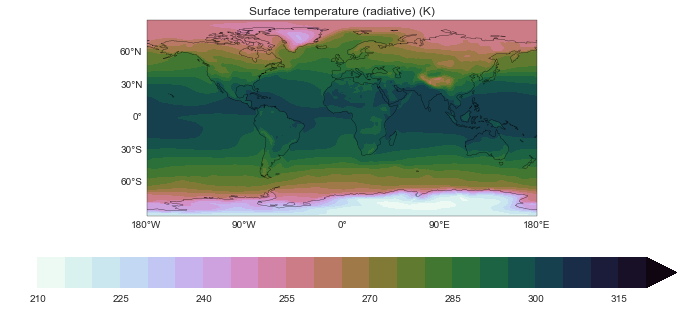

In [83]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
gp = ma.global_plot(data, ax=ax, cmap="cubehelix_r",
               levels=np.linspace(210, 320, 23))
cb = plt.colorbar(orientation='horizontal')
_ = plt.title(v.long_name + " (%s)" % v.units)

## Under the hood

<a href="http://xray.readthedocs.org/en/stable/"><img src="media/xray.png" /></a>

([link to xray docs](http://xray.readthedocs.org/en/stable/))

## `xray`

- Powerful toolkit for accessing and manipulating and wrangling NetCDF / HDF5 data
- Maintained by employees from [**THE CLIMATE CORPORATION**](https://www.climate.com/)
- Under active development
- Cool features:
    - lazy evaluation system; doesn't do any numerical work until it *absolutely* needs to
    - implements [`dask`](http://dask.pydata.org/en/latest/) out-of-core computation library
    - extends pythonic interfaces for arrays and maps
    - serialize to/from NetCDF

### Simple xray example

In [90]:
v = ma.CESMVar("TS")
v.load_datasets()
data = ma.create_master(v)

Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_min_smax_F2000_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_min_smax_F1850_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_comp_F2000_TS.nc
Loading TS (Surface temperature (radiative)) [K]
from /Users/daniel/Desktop/MARC_AIE/work/arg_comp_F1850_TS.nc


In [91]:
print(data)

<xray.Dataset>
Dimensions:    (act: 2, aer: 2, lat: 96, lev: 30, lon: 144, nbnd: 2, time: 12)
Coordinates:
  * act        (act) <U12 'arg_min_smax' 'arg_comp'
  * aer        (aer) <U5 'F2000' 'F1850'
  * lev        (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
  * time       (time) datetime64[ns] 2007-02-01 2007-03-01 2007-04-01 ...
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 -78.63 ...
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * nbnd       (nbnd) int64 0 1
Data variables:
    hyam       (lev) float64 0.003643 0.007595 0.01436 0.02461 0.03827 ...
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    P0         float64 1e+05
    time_bnds  (time, nbnd) float64 2.555e+03 2.586e+03 2.586e+03 2.614e+03 ...
    gw         (lat) float64 0.0001367 0.001093 0.002185 0.003275 0.004361 ...
    PS         (act, aer, time, lat, lon) float64 6.871e+04 6.871e+04 ...
    TS         (act,

In [106]:
pd_minus_pi = lambda ds: ds.sel(aer='F2000') - ds.sel(aer='F1850')

a = (data['TS']
        .pipe(pd_minus_pi)
        .mean('lon')
        .groupby('time.season')
        .mean('time'))
print(a)

<xray.DataArray 'TS' (act: 2, season: 4, lat: 96)>
array([[[  4.61950867e-01,   5.59026612e-01,   4.55550123e-01,
           2.36727326e-01,   3.18702133e-01,   3.07158188e-01,
           4.00162096e-01,   2.57165096e-01,  -2.51953690e-03,
          -1.69026445e-01,  -2.49001574e-01,  -2.79389205e-01,
          -1.92487787e-01,  -1.28579458e-01,  -8.24304510e-02,
          -5.55523766e-02,  -3.27090511e-02,  -1.18752939e-02,
          -1.07835840e-03,  -7.05789637e-03,  -1.06829890e-02,
          -9.91637618e-03,  -1.87625885e-02,  -2.38267404e-02,
          -3.81276872e-02,  -2.91075530e-02,  -8.74378063e-03,
           5.13648987e-03,   2.97010210e-02,   8.00307945e-02,
           1.22102243e-01,   1.57001919e-01,   1.46723571e-01,
           1.78918768e-01,   1.59398679e-01,   1.16689329e-01,
           8.40828507e-02,   3.72428894e-02,  -4.74922039e-02,
          -8.98047553e-02,  -9.58072521e-02,  -7.10083290e-02,
          -4.92844758e-02,  -2.74109311e-02,  -1.85739729e-02,
    

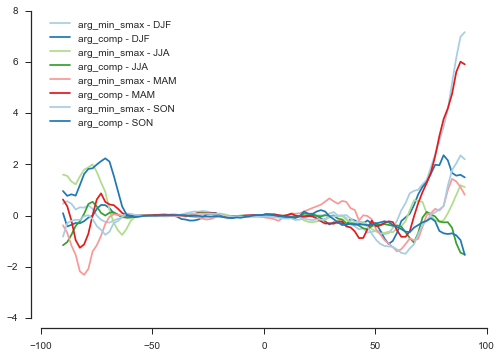

In [120]:
import seaborn as sns
sns.set(style='ticks')

with sns.color_palette('Paired'):

    for seas in a.season:
        for act in a.act:
            d = a.sel(season=seas, act=act)
            plt.plot(d.lat, d, label="%s - %s" %
                     (act.values, seas.values))
            
sns.despine(offset=10)
plt.legend(loc='best')